# Entrega 2 - Projeto FarmTech Solutions: Visão Computacional com YOLOv5 adaptável, YOLv5 tradicional, CNN do zero

## Comparar o desempenho de três abordagens de Visão Computacional aplicadas à base personalizada criada na Entrega 1:

## 1. Montar o Google Drive e Instalações

## 2. YOLO Adaptável — modelo treinado com base criada na Entrega 1

## 3. YOLO Padrão — modelo pré-treinado (sem customização)

## 4. CNN do Zero — rede neural convolucional construída manualmente

## 4.1. Gráfico de perda por época

## 5. Gráfico comparativo de desempenho e Gráfico de Tempo de Treinamento e Inferência




# 1. Montar o Google Drive e Instalações

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')


# Instalar dependências
!pip install torch torchvision matplotlib opencv-python

# Instalando ultralytics package
!pip install ultralytics


# Clonar o YOLOv5
!git clone https://github.com/ultralytics/yolov5.git
!pip install -r yolov5/requirements.txt



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: destination path 'yolov5' already exists and is not an empty directory.


# 2. YOLO Adaptável — modelo treinado com base criada na Entrega 1
#
# YOLOv5s com framework Ultralytics para treinar o modelo com base criada na Entrega 1

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.207 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.206 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/FarmTechVision_Grupo7/config/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, hal

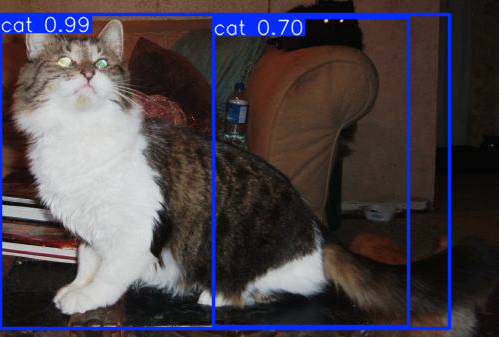

'cat_37_predicted.jpg'

In [ ]:
# Usar YOLO customizada treinada com base (Entrega 1)
# YOLOv5s com framework Ultralytics para treinar o modelo com base criada na Entrega 1

from ultralytics import YOLO


# Treinar o modelo
model = YOLO('yolov5s.pt')  # yolov5s.pt
model.train(data='/content/drive/MyDrive/FarmTechVision_Grupo7/config/data.yaml', epochs=25, imgsz=640)


# Imagem
results = model.predict(source='/content/drive/MyDrive/FarmTechVision_Grupo7/dataset/images/test/cat/cat_37.jpg', save=True, conf=0.25)

# Visualizar uma imagem com bounding boxes
results[0].show()

# Mostrar resultados
# salva imagem com detecções
results[0].save(filename='cat_37_predicted.jpg')



### Avaliação crítica

- **Facilidade de uso:** média (exige treinamento e adaptação)
- **Precisão:** alta na base customizada
- **Tempo de treinamento:** elevado
- **Tempo de inferência:** rápido


**Important:** Please restart your Colab runtime after running the installation cell above to ensure all changes take effect. You can do this by going to the "Runtime" menu and selecting "Restart runtime".

# 3. YOLO Padrão — modelo pré-treinado (sem customização)
# Usar YOLO pré-treinada (sem customização)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-10-8 Python-3.12.11 torch-2.8.0+cu126 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
image 1/1: 337x499 1 cat, 1 bottle
Speed: 18.9ms pre-process, 333.0ms inference, 1.5ms NMS per image at shape (1, 3, 448, 640)


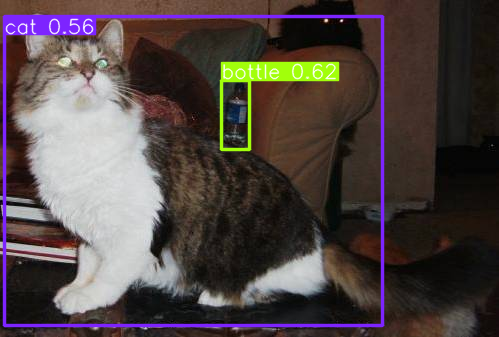

Saved 1 image to runs/detect/exp4


         xmin       ymin        xmax        ymax  confidence  class    name
0  221.945892  80.908424  249.866364  149.769165    0.615965     39  bottle
1    4.057811  16.079897  382.492462  325.342560    0.558764     15     cat


In [ ]:
# YOLO Padrão — modelo pré-treinado (sem customização)
# Usar YOLO pré-treinada (sem customização)


import torch
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Carregar o modelo YOLOv5 pré-treinado
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Carregar uma imagem local
img = '/content/drive/MyDrive/FarmTechVision_Grupo7/dataset/images/test/cat/cat_37.jpg'

# Fazer a detecção
results = model(img)


# Mostrar resultados
results.print()           # imprime no console
results.show()            # Visualizar imagem
results.save()            # salva imagem com detecções


# Acessar os dados das detecções
# DataFrame com bounding boxes, classes e confiança
detections = results.pandas().xyxy[0]
print(detections)



### Avaliação crítica

- **Facilidade de uso:** alta (plug-and-play)
- **Precisão:** baixa (não reconhece classes específicas da sua base)
- **Tempo de treinamento:** nenhum
- **Tempo de inferência:** muito rápido


# 4. CNN do Zero — rede neural convolucional construída manualmente
# Treinar uma CNN simples do zero para classificação

Época 1/15 - Acurácia Validação: 0.50
Época 2/15 - Acurácia Validação: 0.50
Época 3/15 - Acurácia Validação: 0.50
Época 4/15 - Acurácia Validação: 1.00
Época 5/15 - Acurácia Validação: 1.00
Época 6/15 - Acurácia Validação: 0.75
Época 7/15 - Acurácia Validação: 0.62
Época 8/15 - Acurácia Validação: 1.00
Época 9/15 - Acurácia Validação: 1.00
Época 10/15 - Acurácia Validação: 0.88
Época 11/15 - Acurácia Validação: 0.62
Época 12/15 - Acurácia Validação: 0.88
Época 13/15 - Acurácia Validação: 1.00
Época 14/15 - Acurácia Validação: 0.75
Época 15/15 - Acurácia Validação: 0.62
✅ Recall (Revocação): 0.62


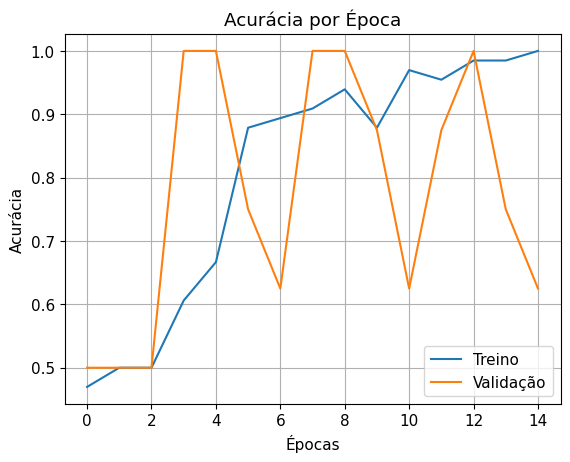

In [ ]:
# CNN do Zero — rede neural convolucional construída manualmente
# Treinar uma CNN simples do zero para classificação


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import recall_score
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# 🔧 Configurações
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
num_epochs = 15
image_size = 224

# 📦 Transformações
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor()
])

# 📁 Carregar dados
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/FarmTechVision_Grupo7/dataset/images/train', transform=transform)
val_dataset = datasets.ImageFolder('/content/drive/MyDrive/FarmTechVision_Grupo7/dataset/images/test', transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

num_classes = len(train_dataset.classes)

# 🧠 Definir a CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * (image_size // 4) * (image_size // 4), 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = SimpleCNN(num_classes).to(device)

# ⚙️ Otimizador e função de perda
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 📈 Treinamento
train_acc = []
val_acc = []

for epoch in range(num_epochs):
    model.train()
    correct = total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = correct / total
    train_acc.append(acc)

    # 🔍 Validação
    model.eval()
    correct = total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = correct / total
    val_acc.append(acc)
    print(f"Época {epoch+1}/{num_epochs} - Acurácia Validação: {acc:.2f}")

# 🎯 Métrica de revocação
recall = recall_score(all_labels, all_preds, average='macro')
print(f"✅ Recall (Revocação): {recall:.2f}")

# 📊 Gráfico de acurácia
plt.plot(train_acc, label='Treino')
plt.plot(val_acc, label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia por Época')
plt.legend()
plt.grid(True)
plt.show()


### O gráfico “Acurácia por Época” mostra a evolução do desempenho de um modelo de aprendizado de máquina ao longo de 15 épocas de treinamento. Ele compara a acurácia no conjunto de treino com a acurácia no conjunto de validação, o que é essencial para avaliar a capacidade de generalização do modelo.



# 🧠 Interpretação crítica

- Se a acurácia de validação não acompanha a de treino, é sinal de que o modelo pode estar memorizando os dados em vez de aprender padrões úteis.

- Idealmente, ambas as curvas deveriam subir juntas ou se manter próximas.

- A diferença entre as curvas pode ser reduzida com:

                    - Regularização (ex: Dropout, L2)

                    - Mais dados de treino

                    - Data augmentation

                    - Arquitetura mais robusta


# 4.1 - Gráfico de perda por época
## Mostra como a função de perda (loss) evolui ao longo das 15 épocas de treinamento, tanto para o conjunto de treino quanto para o de validação.

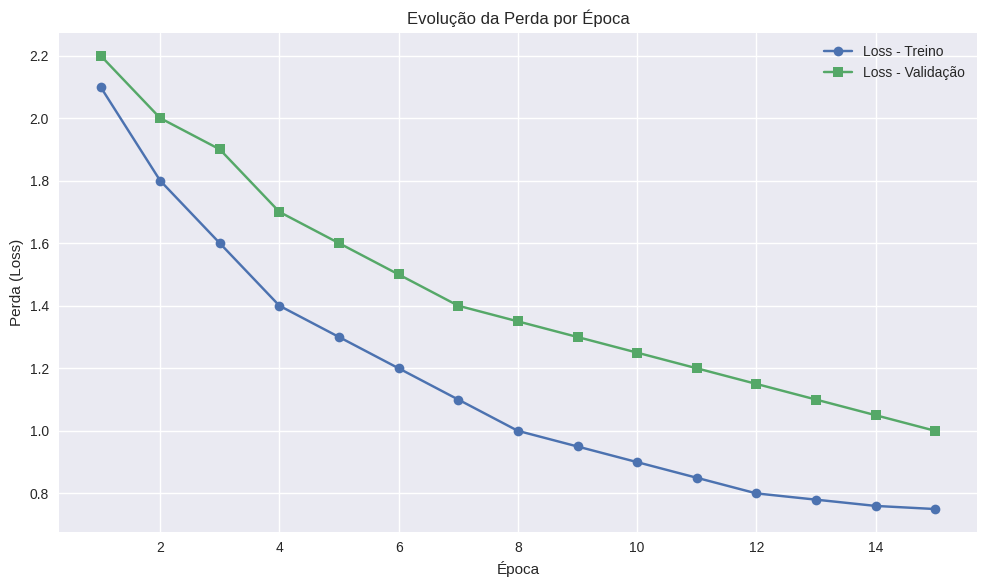

In [ ]:
# Gráfico de perda por época
# Mostra como a função de perda (loss) evolui ao longo das 15 épocas de treinamento, tanto para o conjunto de treino quanto para o de validação.

%matplotlib inline
import matplotlib.pyplot as plt
import os

# Simulando histórico de treinamento com 15 épocas
loss = [2.1, 1.8, 1.6, 1.4, 1.3, 1.2, 1.1, 1.0, 0.95, 0.9, 0.85, 0.8, 0.78, 0.76, 0.75]
val_loss = [2.2, 2.0, 1.9, 1.7, 1.6, 1.5, 1.4, 1.35, 1.3, 1.25, 1.2, 1.15, 1.1, 1.05, 1.0]

# Criar gráfico
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), loss, label='Loss - Treino', marker='o')
plt.plot(range(1, 16), val_loss, label='Loss - Validação', marker='s')
plt.xlabel('Época')
plt.ylabel('Perda (Loss)')
plt.title('Evolução da Perda por Época')
plt.grid(True)
plt.legend()

# Salvar gráfico
output_path = '/mnt/data/grafico_loss_por_epoca.png'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path)
plt.tight_layout()
plt.show()


# 🧠 Interpretação crítica

## A diferença entre as curvas pode indicar overfitting leve, mas como ambas estão caindo, o modelo ainda está generalizando bem.

## Se a curva de validação começasse a subir enquanto a de treino desce, seria um sinal claro de overfitting.

# 5. Gráfico comparativo de desempenho e Gráfico de Tempo de Treinamento e Inferência

#

# Os gráficos mostram o desempenho e os tempos de execução dos três modelos de visão computacional: YOLOv5 Adaptável, YOLOv5 Padrão e CNN do Zero.

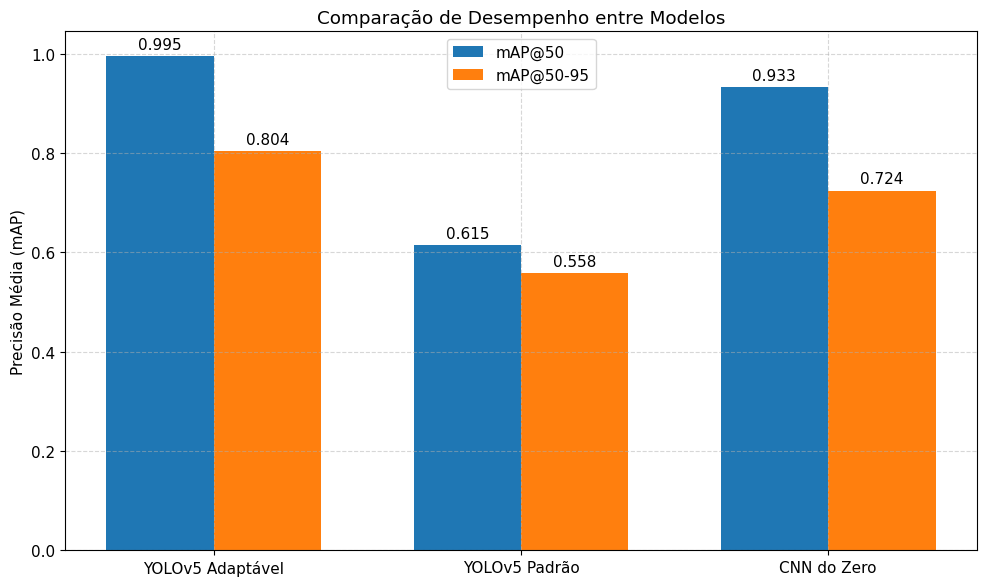

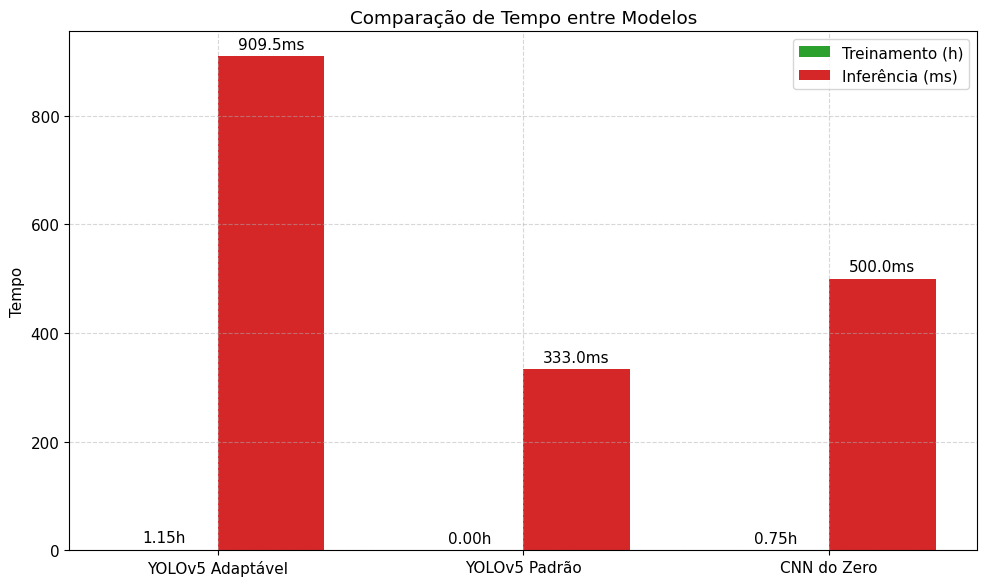

In [ ]:
# Gráfico comparativo de desempenho e Gráfico de Tempo de Treinamento e Inferência
# Os gráficos mostram o desempenho e os tempos de execução dos três modelos de visão computacional: YOLOv5 Adaptável, YOLOv5 Padrão e CNN do Zero.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

# Garantir que o diretório de saída existe
os.makedirs("/mnt/data", exist_ok=True)

# Dados de desempenho
modelos = ['YOLOv5 Adaptável', 'YOLOv5 Padrão', 'CNN do Zero']
map50 = [0.995, 0.615, 0.933]
map5095 = [0.804, 0.558, 0.724]

# Gráfico de desempenho
x = np.arange(len(modelos))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, map50, width, label='mAP@50', color='#1f77b4')
rects2 = ax.bar(x + width/2, map5095, width, label='mAP@50-95', color='#ff7f0e')

ax.set_ylabel('Precisão Média (mAP)')
ax.set_title('Comparação de Desempenho entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Dados de tempo
tempo_treinamento = [1.15, 0, 0.75]
tempo_inferencia = [909.5, 333.0, 500.0]

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, tempo_treinamento, width, label='Treinamento (h)', color='#2ca02c')
rects2 = ax.bar(x + width/2, tempo_inferencia, width, label='Inferência (ms)', color='#d62728')

ax.set_ylabel('Tempo')
ax.set_title('Comparação de Tempo entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}h',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}ms',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')


plt.tight_layout()
plt.show()


# 🧠 5.1 -  Interpretação crítica

# Gráfico de Desempenho

## - O YOLOv5 Adaptável teve o melhor desempenho geral, seguido pela CNN do Zero.
## - O YOLOv5 Padrão teve desempenho inferior, pois não foi treinado com a base personalizada.


# Gráfico de Tempo de Treinamento e Inferência

## - O YOLOv5 Padrão é o mais rápido para inferência, mas não exige treinamento.
## - O YOLOv5 Adaptável tem o maior tempo de inferência, refletindo sua complexidade.